<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Dahemo76/blob/main/Baseline_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

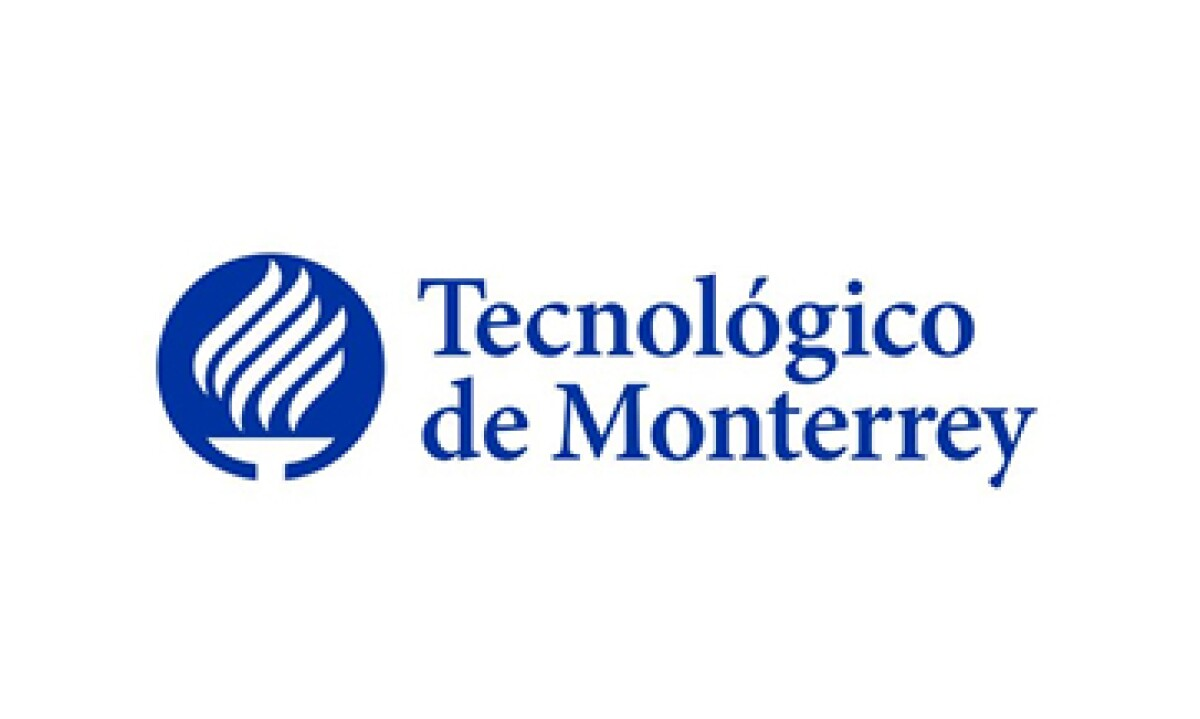

#**Maestría en Inteligencia Artificial Aplicada**
##**Proyecto Integrador**
###Tecnológico de Monterrey
###Prof Gretel Barceló Alonso

### **Semana 5**
####**Avance 3: Baseline**
# Equipo 1
#**Rodrigo Ruiz Gonzalez Matricula : A01793081**
#**Daniel Hernandez Mora Matricula : A01793538**
#**Juan Sebastián Téllez López Matricula : A01793859**

# 👋 **Baseline**

También conocida como fase de referencia o fase de establecimiento de la línea base, es la etapa inicial de un proyecto de análisis de datos que tiene como objetivo establecer un punto de partida para medir el cambio y evaluar el impacto de las iniciativas o intervenciones que se implementarán posteriormente.
Importancia:

La fase de baseline es crucial por las siguientes razones:

- Proporciona un contexto: Permite comprender el estado actual de las variables clave antes de realizar cualquier cambio, lo que facilita la comparación y el análisis de resultados.
- Ayuda a identificar tendencias: Al analizar los datos de baseline, se pueden identificar tendencias y patrones existentes, lo que puede ser útil para establecer objetivos y estrategias de mejora.
- Facilita la evaluación de la efectividad: Sirve como punto de referencia para evaluar el impacto de las acciones o intervenciones que se implementarán, permitiendo determinar si estas han tenido un efecto positivo, negativo o nulo.
- Permite la toma de decisiones informadas: Brinda información valiosa para tomar decisiones estratégicas y asignar recursos de manera eficiente, basándose en datos concretos y no en suposiciones.

Pasos a seguir en la fase de baseline:

- Definición de objetivos: Establecer claramente los objetivos del análisis de datos y las variables clave que se quieren medir.
Recopilación de datos: Recolectar datos históricos relevantes para las variables seleccionadas, asegurándose de que sean precisos, confiables y consistentes.
- Limpieza y preparación de datos: Limpiar los datos para eliminar errores, valores atípicos y inconsistencias, y prepararlos para el análisis.
Análisis descriptivo: Realizar un análisis descriptivo de los datos de baseline para comprender su distribución, tendencias y patrones.
- Establecimiento de métricas: Definir métricas de rendimiento adecuadas para evaluar el impacto de las acciones o intervenciones que se implementarán.
- Documentación de resultados: Documentar los resultados de la fase de baseline, incluyendo la descripción de los datos, los hallazgos del análisis y las métricas establecidas

# ➡️**Importamos librerias**

---

Las Librerias en Python son herramientas esenciales que potencia la productividad, la calidad del código, las capacidades del lenguaje, la colaboración y la innovación en el desarrollo de software y el análisis de datos. Para nuestra modelo, utilizaremos las siguientes librerias:

- `pandas`: Esencial para la manipulación y análisis de datos estructurados. Permite cargar conjuntos de datos, realizar filtrado, limpieza, y transformaciones de datos, así como realizar operaciones de unión y agrupación de datos.

- `numpy`: Proporciona estructuras de datos eficientes para el cálculo numérico, lo que es crucial para operaciones matemáticas y de manipulación de matrices en machine learning.

- `matplotlib y seaborn`: Ambas son librerías de visualización que permiten crear gráficos estadísticos y visualizaciones de datos de manera efectiva, lo que es esencial para comprender la distribución de los datos y la relación entre las variables.

- `scipy.stats`: Proporciona funciones estadísticas y herramientas para el análisis de datos, como cálculo de skewness (sesgo) que es útil para entender la distribución de los datos.

- `scikit-learn (sklearn)`: Esta librería ofrece una amplia variedad de algoritmos de machine learning, herramientas para preprocesamiento de datos, evaluación de modelos, selección de características, etc. Es una de las librerías más populares y completas en el ámbito del machine learning.

- `skimagev: Proporciona una variedad de algoritmos y herramientas para procesamiento de imágenes, útil si estás trabajando con datos de imágenes en tu modelo de machine learning. Por ejemplo, la función hog para extraer características de imágenes.

- `FactorAnalysis`: Una técnica de reducción de dimensionalidad similar a PCA, pero asume una distribución subyacente gaussiana. Útil para reducir la dimensionalidad de los datos y eliminar la multicolinealidad.

- `RandomForestClassifier`: Un algoritmo de aprendizaje supervisado para clasificación que es robusto y fácil de usar, y a menudo proporciona buenos resultados sin mucha configuración.

- `SVC`: El clasificador de vectores de soporte es un algoritmo poderoso para clasificación y regresión que puede manejar datos lineales y no lineales.

- `GridSearchCV`: Una herramienta útil para la búsqueda exhaustiva de los mejores hiperparámetros de un modelo, lo que ayuda a optimizar el rendimiento del modelo.

- `roc_curve, auc, calibration_curve, classification_report, confusion_matrix`: Estas funciones y métricas son esenciales para evaluar el rendimiento de un modelo de clasificación, ayudando a comprender su capacidad predictiva, su sensibilidad y especificidad, entre otras métricas importantes.

In [12]:
import pandas as pd
import datetime
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# ➡️ **Introduccion**

---

En el siguiente notebook vamos a realizar 4 experimentos que nos van a proporcionar un criterio y un argumento solido para la elección de nuestro modelo, en lo cual enfatizaremos en variantes de nuestro conjunto de datos, los cuales consisten en:

- input original.
- input original con `PCA`
- input original con balanceo de clases
- input original con `PCA` + balanceo de clases

Para cada uno vamos a aplicar las respectivas validaciones de

- `Matriz de confusión`
- `Reporte de clasificación`
- `Curva de aprendizaje`
- `Curva de validacion`
- `Curva de calibración`
- `Curva ROC`
- `Feature importance`

Donde agregaremos nuestro argumento respecto los resultados y como estos pueden impactar tanto positiva como negativamente en nuestro proyecto.

#➡️ **Conceptos Generales**

---

## Random-Forest

Los bosques aleatorios (`Random Forest`) son una técnica de aprendizaje automático que pertenece a la categoría de métodos de conjunto. Combinan las predicciones de múltiples árboles de decisión para crear un modelo más robusto y preciso. usan ampliamente en diversos dominios. Sus fortalezas en precisión, versatilidad y manejo de valores faltantes los convierten en una herramienta valiosa en su kit de herramientas de aprendizaje automático. Sin embargo, tenga en cuenta sus desventajas potenciales con respecto a la interpretabilidad,el costo computacional y el ajuste de hiperparámetros. La técnica de `Random Forest` nos proprciona las siguientes ventajas:

- **Alta precisión y robustez**: Al combinar múltiples árboles, los bosques aleatorios a menudo logran una mayor precisión en datos no vistos en comparación con los árboles de decisión individuales. La aleatoriedad introducida durante el entrenamiento ayuda a prevenir el sobreajuste.
- **Maneja tanto problemas de clasificación como de regresión**: Los bosques aleatorios son versátiles y se pueden aplicar a ambas tareas, lo que los convierte en una opción ideal para varios escenarios de aprendizaje automático.
- **Puede manejar datos faltantes**: Los bosques aleatorios pueden manejar inherentemente datos faltantes dentro de los árboles, lo que los hace menos propensos a los pasos de preprocesamiento de datos para valores faltantes.
- **Proporciona importancia de las características**: Los bosques aleatorios pueden calcular la importancia de cada característica para hacer predicciones, ofreciendo información sobre qué características contribuyen más al rendimiento del modelo.

## Matriz de confusión

Una `matriz de confusión` es una tabla que resume el rendimiento de un modelo de clasificación. Muestra el número de predicciones correctas e incorrectas realizadas por el modelo para cada clase. Esta información se puede utilizar para evaluar la precisión del modelo e identificar áreas de mejora.

En el contexto de los horarios de cobranza, la `matriz de confusión` se puede utilizar para identificar qué tipos de clientes tienen más probabilidades de incumplir con sus pagos. Esta información luego se puede usar para enfocarse en estos clientes con esfuerzos de cobranza más agresivos. Por ejemplo, si la matriz muestra que los clientes con un historial de pagos atrasados ​​tienen más probabilidades de incumplir, el equipo de cobranza podría concentrarse en contactar a estos clientes al principio del proceso de cobranza.

Se puede usar una `matriz de confusión` con un conjunto de datos que contiene variables tanto numéricas como categóricas. Las variables numéricas se pueden utilizar para entrenar el modelo, mientras que las variables categóricas se pueden utilizar para segmentar los datos y analizar el rendimiento del modelo para diferentes grupos de clientes.

La `matriz de confusión` nos servirá para analizar el rendimiento del modelo para diferentes grupos de clientes, como aquellos con puntajes de crédito altos, ingresos bajos o un historial de pagos atrasados.

## Reporte de clasificación

Un `reporte de clasificación` es un documento que resume y presenta los resultados de un proceso de clasificación. Se utiliza en diversos ámbitos, como la ciencia de datos, el análisis de negocios, el control de calidad y la gestión de riesgos. Los `reportes de clasificación` son herramientas esenciales para analizar y comunicar los resultados de procesos de clasificación. Su importancia radica en la capacidad de brindar información valiosa para la toma de decisiones, la evaluación del desempeño, la comunicación efectiva, el monitoreo y seguimiento, y la identificación de riesgos. Su uso se extiende a diversos ámbitos,como la ciencia de datos,el análisis de negocios,el control de calidad y la gestión de riesgos.

## Curva de aprendizaje

Una `curva de aprendizaje` en el contexto del aprendizaje automático (ML) es una gráfica que visualiza el rendimiento de un modelo en función de la cantidad de datos de entrenamiento utilizados.
Se generan dos curvas:

- **Curva de entrenamiento**: Representa el error del modelo sobre los datos de entrenamiento utilizados para entrenarlo.
- **Curva de validación**: Muestra el error del modelo sobre un conjunto de datos de validación independiente que no se utilizó para el entrenamiento.

Evaluación del subajuste y el sobreajuste:

- **Sub-entrenamiento**: Si la curva de entrenamiento sigue mejorando significativamente incluso con más datos, indica que el modelo es demasiado simple y no captura las complejidades de los datos (subentrenamiento).
- **Sobre-entrenamiento**: Si la curva de entrenamiento mejora rápidamente y luego comienza a aumentar con más datos, sugiere que el modelo está memorizando los datos de entrenamiento y no generaliza bien a nuevos datos (sobreentrenamiento).
- **Seleccionar el mejor modelo**: Comparar las `curva de aprendizaje` de diferentes modelos entrenados con diferentes cantidades de datos puede ayudar a seleccionar el modelo que mejor se generaliza a datos no vistos.
- **Optimizar la cantidad de datos de entrenamiento**: Determinar la cantidad óptima de datos de entrenamiento necesarios para que un modelo alcance su mejor rendimiento sin sobreajustarse.
- **Comprender el comportamiento del modelo**: Obtener información sobre cómo el modelo aprende y mejora a medida que se expone a más datos.

In [13]:
def plot_learning_curve(estimator, X, y, title=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Supongamos que ya tienes tus datos de entrenamiento X_train, y_train

# Crear un RandomForestClassifier con los mismos parámetros que el modelo entrenado
random_forest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                       criterion='gini', max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0, min_samples_leaf=1,
                                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=365, verbose=0,
                                       warm_start=False)

## Curva de calibración

La `curva de calibración` es una gráfica que muestra la probabilidad predita de un modelo de clasificación frente a la probabilidad real. Esta información se puede utilizar para evaluar la confianza del modelo en sus predicciones y determinar si las predicciones son calibradas.

Un modelo calibrado es un modelo cuyas predicciones de probabilidad son confiables. Esto significa que si el modelo predice que hay un 80% de probabilidad de que un cliente incumpla con un pago, entonces el 80% de las veces que el modelo haga esta predicción, el cliente realmente incumplirá.

En el contexto de los horarios de cobranza, la `curva de calibración` se puede utilizar para identificar si el modelo está prediciendo correctamente la probabilidad de incumplimiento. Si la `curva de calibración` está por encima de la línea diagonal, el modelo está prediciendo que la probabilidad de incumplimiento es más alta de lo que realmente es. Esto significa que el modelo es demasiado optimista y podría estar asignando recursos de cobranza a clientes con un bajo riesgo de incumplimiento. Por otro lado, si la `curva de calibración` está por debajo de la línea diagonal, el modelo está prediciendo que la probabilidad de incumplimiento es más baja de lo que realmente es. Esto significa que el modelo es demasiado pesimista y podría estar perdiendo oportunidades de cobrar deudas.

****SE BAJO EL CODIGO A LA SECCION CORRESPONDIENTE****

## Curva ROC

El `AUC` (`Area Under the Curve`) es una métrica comúnmente utilizada para evaluar la calidad de un clasificador binario basado en su curva `ROC`. La curva `ROC` representa la tasa de verdaderos positivos (TPR) frente a la tasa de falsos positivos (`FPR`) en diferentes umbrales de clasificación.

`TPR` (True Positive Rate): También conocido como sensibilidad o recall, es la proporción de ejemplos positivos que son correctamente clasificados como positivos por el modelo. Se calcula como `TPR = TP / (TP + FN)`, donde `TP` es el número de verdaderos positivos y `FN` es el número de falsos negativos.

`FPR` (False Positive Rate): Es la proporción de ejemplos negativos que son incorrectamente clasificados como positivos por el modelo. Se calcula como `FPR` = `FP` / (`FP` + `TN`), donde `FP` es el número de falsos positivos y `TN` es el número de verdaderos negativos.

El `AUC` es el área debajo de la curva `ROC` y varía entre 0 y 1. Cuanto mayor sea el `AUC`, mejor será el rendimiento del clasificador. Aquí hay una interpretación general del `AUC`:

`AUC` = 1: Indica un clasificador perfecto que puede distinguir perfectamente entre clases positivas y negativas sin errores.
0.5 < `AUC` < 1: Indica que el clasificador tiene algún poder discriminativo, donde un valor más alto sugiere un mejor rendimiento.
`AUC` = 0.5: Indica un clasificador que es equivalente a una selección aleatoria. En otras palabras, no tiene capacidad discriminativa.
`AUC` < 0.5: Indica que el clasificador está funcionando peor que una selección aleatoria.

In [16]:
def plot_roc_curve(y_true, y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

## Feature Importance

La importancia de las características en el aprendizaje automático (ML) se refiere a la medida de la relevancia de cada característica individual para el rendimiento de un modelo ML. En otras palabras, identifica qué características contribuyen más a la capacidad del modelo para realizar predicciones precisas.

Importancia:

- **Mejora la interpretabilidad del modelo**: Al comprender qué características son más importantes, se puede obtener una mejor comprensión de cómo funciona el modelo y qué factores influyen más en sus decisiones.
- **Selección de características relevante**: Permite identificar las características más relevantes y eliminar las redundantes o irrelevantes, lo que puede mejorar el rendimiento del modelo y reducir la complejidad computacional.
- **Detección de colinealidad**: Ayuda a detectar características que están altamente correlacionadas entre sí, lo que puede indicar problemas de multicolinealidad y afectar negativamente el rendimiento del modelo.
- **Enfoque en las características más importantes**: Permite enfocar los esfuerzos de análisis y recolección de datos en las características que tienen el mayor impacto en el modelo.
- **Comunicación efectiva**: Facilita la comunicación de los resultados del modelo a las partes interesadas, destacando las características más importantes que impulsan las predicciones.

## Submuestreo

El `submuestreo` es una técnica que se utiliza para reducir el tamaño de un conjunto de datos eliminando un subconjunto de los puntos de datos. Esto puede ser útil para entrenar modelos de ML en conjuntos de datos desequilibrados, donde hay significativamente más puntos de datos para una clase que para otra.

En el contexto de la programación de cobros, los conjuntos de datos pueden estar desequilibrados si hay muchos más clientes que pagan sus deudas a tiempo que clientes que incumplen. Esto puede dificultar que los modelos de ML aprendan a identificar las características de los clientes que probablemente incumplirán.

El `submuestreo` se puede utilizar para mejorar el rendimiento de los modelos de ML en conjuntos de datos desequilibrados al reducir el número de puntos de datos para la clase mayoritaria. Esto puede ayudar al modelo a centrarse en la clase minoritaria y aprender a identificar las características que son más predictivas del incumplimiento.

# ➡️ **Experimento 1 - Input Original**

---

## Importamos nuestro input

Posterior a la fase de Ingenieria de caractarísticas, nuestro Dataset está compuesto por 30 columnas con 406254 renglones, almacenados en un archivo con extension CSV, el cual generado en la entrega anterior. Este dataset nos servirá como base para realizar los 4 expermientos con el algoritmo de`Random Forest`

In [17]:
df = pd.read_csv("input_transformada.csv", sep=';', encoding ="latin-1")
df.head(5)

,GENERO,SEGMENTO_CLIENTE,RECUPERACION,NEGOCIACION_ACTIVA,MARCA_TIPO_CARTERA,PRIORIDAD,EDAD,RIESGO_ACTUAL,MORA_INICIAL,MORA_ACTUAL,...,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,DESC_ACTIVIDAD_codificado,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,ESTADO_ICS_ACTUAL,MOTIVO_NO_PAGO_codificado,SUB_PRODUCTO_codificado,RANGO_HORA
0,1,0,2,0,1,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,1
1,1,0,2,0,1,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,0
2,1,0,2,0,1,21,23,0,30,0,...,9,1,1,3,3,26,6,6,3,0
3,1,0,2,0,1,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,0
4,1,0,2,0,1,5,23,0,30,0,...,9,1,1,3,3,26,6,6,3,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406255 entries, 0 to 406254
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   GENERO                     406255 non-null  int64  
 1   SEGMENTO_CLIENTE           406255 non-null  int64  
 2   RECUPERACION               406255 non-null  int64  
 3   NEGOCIACION_ACTIVA         406255 non-null  int64  
 4   MARCA_TIPO_CARTERA         406255 non-null  int64  
 5   PRIORIDAD                  406255 non-null  int64  
 6   EDAD                       406255 non-null  int64  
 7   RIESGO_ACTUAL              406255 non-null  int64  
 8   MORA_INICIAL               406255 non-null  int64  
 9   MORA_ACTUAL                406255 non-null  int64  
 10  C_RIESGO                   406255 non-null  int64  
 11  DIAS_ACTUAL                406255 non-null  int64  
 12  CICLO_OBLIG                406255 non-null  int64  
 13  SALDO_OBLIG                40

## Dividimos para nuestro conjunto de entrenamiento y pruebas

Dividir el conjunto de datos en entrenamiento y prueba es un paso fundamental en el desarrollo de nuestro modelo de ML confiables y generalizables para mejorar los horarios de cobranza. Al hacerlo, vamos a  evitar el sobrentrenamiento, evaluar objetivamente el rendimiento del modelo, seleccionar el mejor modelo y garantizar la robustez del modelo a variaciones en los datos.

In [18]:
X = df.drop(columns=['RANGO_HORA'])
y = df['RANGO_HORA']

Entrenaremos el modelo en el 80% de los datos ( **conjunto de entrenamiento**) y evaluarlo ( **conjunto de pruebas**) en el 20% restante para medir su rendimiento

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenamiento del modelo

Nuestro modelo construirá un conjunto de 100 `árboles de decisión` (debido a `n_estimators=100`), donde cada árbol se entrena en una porción del conjunto de datos con las configuraciones especificadas.

In [20]:
random_forest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                       criterion='gini', max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0, min_samples_leaf=1,
                                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=365, verbose=0,
                                       warm_start=False)

# Entrenar el modelo con los datos de entrenamiento
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=365)

## Generamos predicciones

In [21]:
y_pred = random_forest.predict(X_test)

## Matriz de confusión

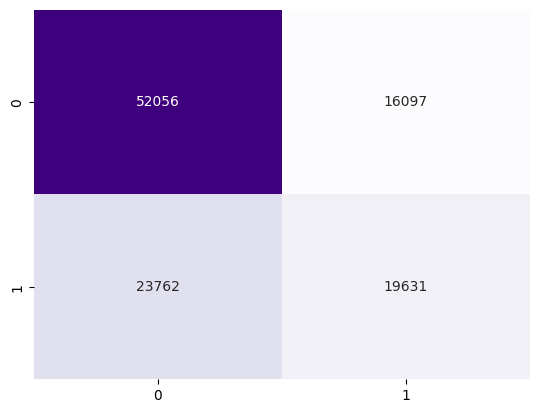

In [22]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
sns.heatmap(cm,  annot=True, fmt='g', cmap='Purples', cbar=False)
plt.show()

valores obtenidos en la matriz de confusión:

- `True Negatives (TN)`: 52056
- `False Positives (FP)`: 16097
- `False Negatives (FN)`: 23761
- `True Positives (TP)`: 19632

Interpretacion:

- `True Negatives (TN)`: Esto indica que 52,056 ejemplos fueron correctamente clasificados como negativos por el modelo.

- `False Positives (FP)`: Esto indica que 16,097 ejemplos fueron incorrectamente clasificados como positivos por el modelo. En otras palabras, el modelo predijo que estos ejemplos pertenecían a la clase positiva cuando en realidad eran negativos.

- `False Negatives (FN)`: Esto indica que 23,761 ejemplos fueron incorrectamente clasificados como negativos por el modelo. El modelo predijo que estos ejemplos pertenecían a la clase negativa cuando en realidad eran positivos.

- `True Positives (TP)`: Esto indica que 19,632 ejemplos fueron correctamente clasificados como positivos por el modelo.

In [23]:
print(cm)

[[52056 16097]
 [23762 19631]]


## Reporte de clasificación

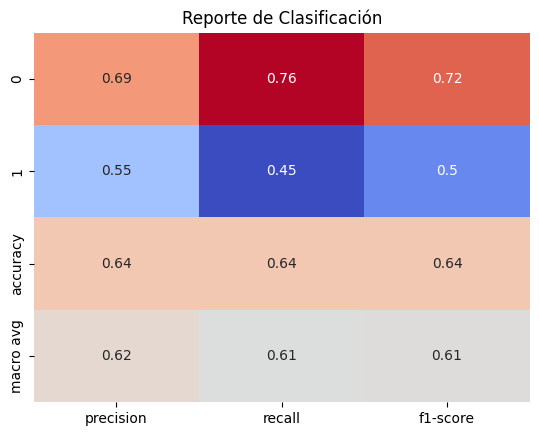

In [24]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Visualizamos el reporte de clasificación con colores usando seaborn
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap=cmap, cbar=False)
plt.title('Reporte de Clasificación')
plt.show()

`Precision`: La `precisión` es la proporción de ejemplos clasificados como positivos por el modelo que realmente son positivos. En este caso, la `precisión` para la `clase 0` es del 69% y para la `clase 1` es del 55%. Esto significa que el 69% de los ejemplos clasificados como clase 0 son verdaderamente `clase 0`, y el 55% de los ejemplos clasificados como `clase 1` son verdaderamente clase 1.

`Recall`: El `recall`, también conocido como sensibilidad, es la proporción de ejemplos positivos que fueron correctamente identificados por el modelo. En este caso, el `recall` para la `clase 0` es del 76% y para la `clase `1 es del 45%. Esto significa que el 76% de los ejemplos de la `clase 0` fueron correctamente identificados por el modelo, y solo el 45% de los ejemplos de la `clase 1` fueron correctamente identificados.

`F1-score`: La puntuación `F1` es la media armónica de la `precisión` y el `recall`, y es una medida que tiene en cuenta tanto los falsos positivos como los falsos negativos. En este caso, la puntuación `F1` para la `clase 0` es del 72% y para la `clase 1` es del 50%.

Support: El soporte es el número de ocurrencias reales de cada clase en el conjunto de datos.

Además de estas métricas individuales para cada clase, también se proporciona la `precisión`, el `recall` y la puntuación `F1` para el conjunto de datos en general.

En general, estos resultados indican que el modelo tiene un rendimiento decente para la `clase 0` (`precisión` del 69%, `recall` del 76% y `F1-score` del 72%), pero un rendimiento menos satisfactorio para la `clase 1` (`precisión` del 55%, `recall` del 45% y `F1-score` del 50%). Esto sugiere que el modelo puede estar sesgado hacia la clase mayoritaria y puede necesitar ajustes para mejorar su capacidad para identificar la clase minoritaria.

## Curva de aprendizaje

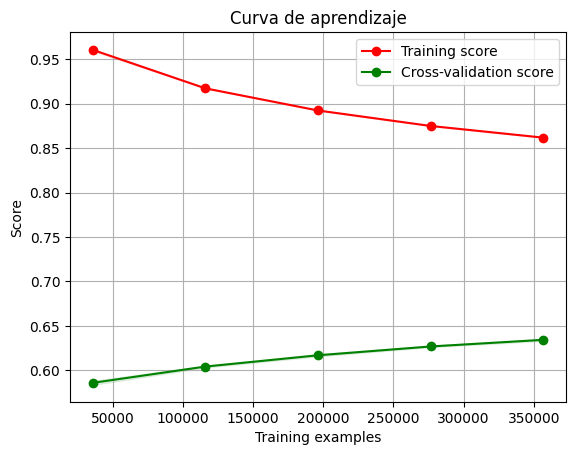

In [25]:
# Llamar a la función para graficar la curva de aprendizaje
plot_learning_curve(random_forest, X_train, y_train, title='Curva de aprendizaje')
plt.show()

REVISAR ESTA EXPLICACIOOOOON

la puntuación de entrenamiento se mantiene constante en 1, lo cual indica que el modelo está memorizando los datos de entrenamiento perfectamente, pero la puntuación de validación cruzada (cross-validation score) está cambiando a medida que aumenta el tamaño del conjunto de entrenamiento.

**Puntuación de entrenamiento constante en 1:**

 Esto sugiere que el modelo está ajustando perfectamente los datos de entrenamiento, lo que puede ser una señal de sobreajuste (overfitting). El modelo puede estar memorizando los datos en lugar de aprender patrones generales que se pueden aplicar a datos nuevos.

**Curva de validación cruzada cambiante:**

 - Inicialmente, la puntuación de validación cruzada es más baja, pero a medida que aumenta el tamaño del conjunto de entrenamiento, la puntuación de validación cruzada mejora. Esto indica que agregar más datos de entrenamiento está ayudando al modelo a generalizar mejor.
 - Sin embargo, es importante observar si hay una tendencia constante de mejora o si la puntuación de validación cruzada se estabiliza en un cierto punto. Y en este caso el modelo ha alcanzado su límite de capacidad de aprendizaje y agregar más datos no mejorará significativamente el rendimiento.

## Curva de calibración

In [ ]:
y_prob = random_forest.predict_proba(X_test)[:, 1]

def plot_calibration_curve(y_true, y_prob, n_bins=10, strategy='uniform'):
    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=n_bins, strategy=strategy)

    plt.figure(figsize=(8, 6))
    plt.plot(prob_pred, prob_true, marker='o', linestyle='-', color='blue', label='Calibration curve')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
    plt.xlabel('Mean predicted probability')
    plt.ylabel('Fraction of positives')
    plt.title('Calibration Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

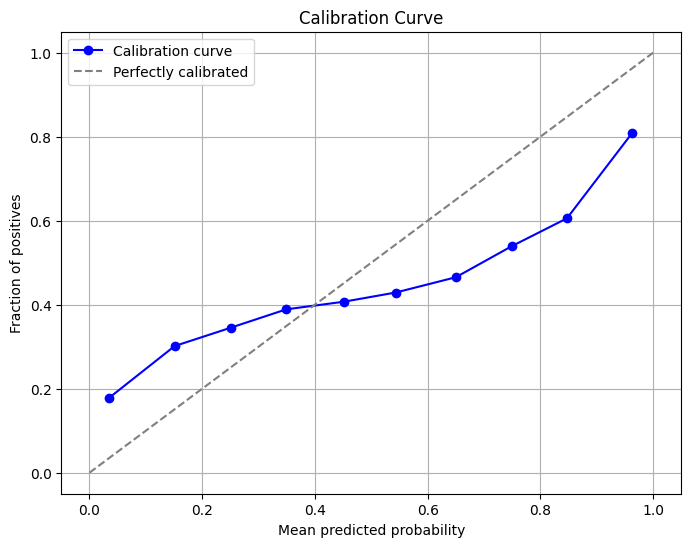

In [28]:
plot_calibration_curve(y_test, y_prob)

**Fracción de Positivos:** Este valor indica la proporción de ejemplos positivos observados en cada grupo de predicciones. Por ejemplo, en el primer bin, la fracción de positivos es aproximadamente 0.177, lo que significa que alrededor del 17.7% de los ejemplos en este rango tienen una etiqueta positiva.

**Media de la Probabilidad Predicha:** Este valor representa la probabilidad promedio predicha para los ejemplos en cada bin. Por ejemplo, en el primer bin, la media de la probabilidad predicha es aproximadamente 0.034, lo que sugiere que, en promedio, los ejemplos en este rango tienen una probabilidad predicha baja de ser positivos.

Al observar estos valores, podemos notar cómo cambia la relación entre la fracción de positivos y la media de la probabilidad predicha a medida que nos movemos a través de los diferentes bins. Idealmente, queremos que la `curva de calibración` esté lo más cerca posible de la línea punteada "Perfectamente calibrada", donde la fracción de positivos coincide con la media de la probabilidad predicha.

En este caso, podemos ver que la fracción de positivos y la media de la probabilidad predicha aumentan de manera bastante uniforme a medida que nos movemos a través de los bins, lo que indica que el modelo está calibrando razonablemente bien las probabilidades predichas.

## Curva ROC

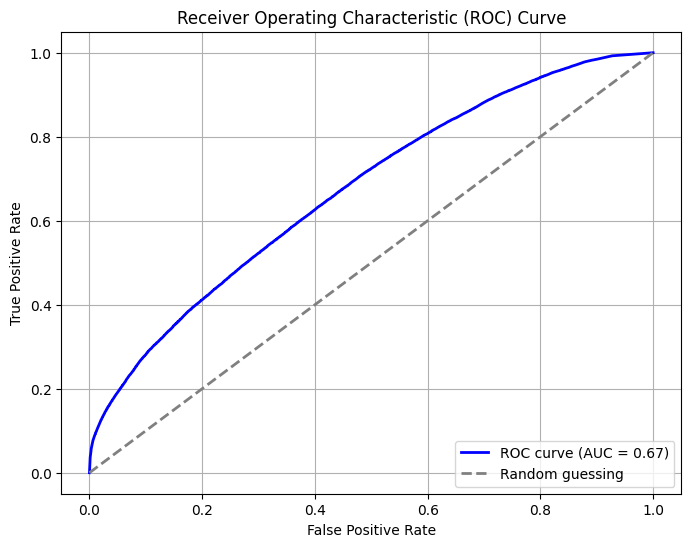

In [29]:
plot_roc_curve(y_test, y_prob)

Un `AUC` de 0.67 sugiere que el clasificador tiene cierta capacidad para distinguir entre las clases positivas y negativas, pero aún hay margen de mejora. Un `AUC` entre 0.5 y 0.7 generalmente se considera aceptable



## Feature importance

In [ ]:
# Obtener los nombres de las características del DataFrame
feature_names = df.columns.tolist()

# Llamando a la función plot_feature_importance con tu modelo y nombres de características
plot_feature_importance(random_forest, feature_names=feature_names)

Interpretación:

- Alta Importancia: Las características con alta importancia (**PRIORIDAD** y **MOTIVO_NO_PAGO**_codificado) son cruciales para el modelo, y cualquier cambio en estas características puede afectar significativamente las predicciones.
- Moderada a Baja Importancia: Características como **CONTEO_CONTACTOS_DIRECTOS, SCORE, y EFECTO_MEJOR_CONTACTO** tienen una menor influencia en el modelo, pero aún así son relevantes para el rendimiento del mismo.

Las Características con menor importancia aún pueden ser útiles, pero si se necesita simplificar el modelo, estas podrían ser candidatas para ser eliminadas o combinadas.

## Analisis de resultados del experimento

Leeer, analizar e interpretar todo lo anterior y dar una buena justificación...

# ➡️ **Experimento 2 - Input Original con PCA**

---

## Importamos nuestro input

Posterior a la fase de Ingenieria de caractarísticas, nuestro Dataset está compuesto por 30 columnas con 406254 renglones, almacenados en un archivo con extension CSV, el cual generado en la entrega anterior. Este dataset nos servirá como base para realizar los 4 expermientos con el algoritmo de`Random Forest`

In [32]:
df = pd.read_csv("input_transformada.csv", sep=';', encoding ="latin-1")
df.head(5)

,GENERO,SEGMENTO_CLIENTE,RECUPERACION,NEGOCIACION_ACTIVA,MARCA_TIPO_CARTERA,PRIORIDAD,EDAD,RIESGO_ACTUAL,MORA_INICIAL,MORA_ACTUAL,...,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,DESC_ACTIVIDAD_codificado,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,ESTADO_ICS_ACTUAL,MOTIVO_NO_PAGO_codificado,SUB_PRODUCTO_codificado,RANGO_HORA
0,1,0,2,0,1,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,1
1,1,0,2,0,1,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,0
2,1,0,2,0,1,21,23,0,30,0,...,9,1,1,3,3,26,6,6,3,0
3,1,0,2,0,1,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,0
4,1,0,2,0,1,5,23,0,30,0,...,9,1,1,3,3,26,6,6,3,1


## Aplicamos PCA

El `Análisis de Componentes Principales (PCA`) es una técnica de reducción de dimensionalidad que se utiliza en Machine Learning por varias razones. Aquí te explico para qué sirve `PCA` en el contexto de un modelo de ML como el que se ha mencionado anteriormente:

Reducción de Dimensionalidad:

- Propósito: `PCA`se utiliza para reducir el número de características (dimensiones) en el conjunto de datos mientras se retiene la mayor cantidad posible de variabilidad presente en los datos originales.
- Beneficio: Esto simplifica el modelo, reduce el costo computacional y puede mejorar el rendimiento del modelo al reducir el ruido y eliminar características redundantes.
Mitigación de la Colinealidad:

- Propósito: `PCA` transforma las características originales en un nuevo conjunto de variables no correlacionadas (componentes principales).
- Beneficio: Esto ayuda a mitigar problemas de colinealidad, donde las características originales están altamente correlacionadas, lo que puede afectar negativamente el rendimiento del modelo.
Mejora del Rendimiento del Modelo:

- Propósito: Al reducir la dimensionalidad, `PCA` puede ayudar a evitar el sobreajuste (overfitting), especialmente cuando se tiene un conjunto de datos con muchas características y relativamente pocas muestras.
- Beneficio: Un modelo con menos características es menos probable que ajuste demasiado el ruido en los datos de entrenamiento, mejorando así la capacidad de generalización del modelo a nuevos datos.
Visualización:

- Propósito: `PCA` puede reducir las características a 2 o 3 componentes principales, lo que permite la visualización de datos en 2D o 3D.
- Beneficio: Esto es útil para explorar los datos, identificar patrones y ganar intuiciones sobre las relaciones entre las características y la variable objetivo.

In [33]:
df_predictors = df.drop(columns=['RANGO_HORA'])
num_components = 5

# Aplica PCA con el número deseado de componentes principales
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(df_predictors)  # 'df_predictors' son las variables predictoras sin la variable objetivo

# Creamos un nuevo DataFrame con las componentes principales como características
df_pca = pd.DataFrame(data=X_pca, columns=[f'Componente_{i+1}' for i in range(num_components)])

# Concatena la variable objetivo ('RANGO_HORA') al DataFrame de las componentes principales
df_pca['RANGO_HORA'] = df['RANGO_HORA']

# Divide los datos en características (X) y variable objetivo (y)
X = df_pca.drop(columns=['RANGO_HORA'])
y = df_pca['RANGO_HORA']

## Dividimos para nuestro conjunto de entrenamiento y pruebas

Entrenaremos el modelo en el 80% de los datos ( **conjunto de entrenamiento**) y evaluarlo ( **conjunto de pruebas**) en el 20% restante para medir su rendimiento

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenamiento del modelo

Nuestro modelo construirá un conjunto de 100 `árboles de decisión` (debido a `n_estimators=100`), donde cada árbol se entrena en una porción del conjunto de datos con las configuraciones especificadas.

In [35]:
random_forest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                       criterion='gini', max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0, min_samples_leaf=1,
                                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=365, verbose=0,
                                       warm_start=False)

# Entrenar el modelo con tus datos de entrenamiento
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=365)

## Generamos predicciones

In [54]:
y_pred = random_forest.predict(X_test)

## Matriz de confusión

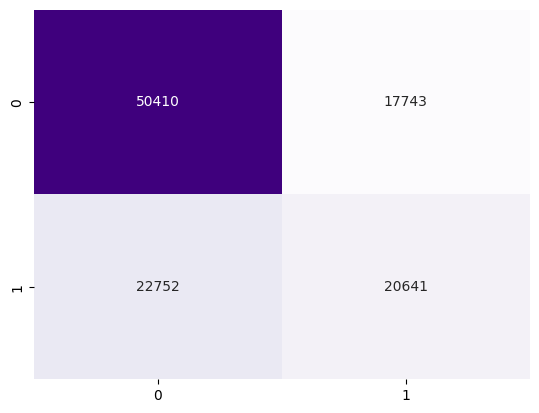

In [55]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
sns.heatmap(cm,  annot=True, fmt='g', cmap='Purples', cbar=False)
plt.show()

valores obtenidos en la `matriz de confusión`:

- `True Negatives (TN)`: 50411
- `False Positives (FP)`: 17742
- `False Negatives (FN)`: 22752
- `True Positives (TP)`: 20641

Interpretacion:

- `True Negatives (TN)`: Esto indica que 50,411 ejemplos fueron correctamente clasificados como negativos por el modelo.

- `False Positives (FP)`: Esto indica que 17,742 ejemplos fueron incorrectamente clasificados como positivos por el modelo. En otras palabras, el modelo predijo que estos ejemplos pertenecían a la clase positiva cuando en realidad eran negativos.

- `False Negatives (FN)`: Esto indica que 22,752 ejemplos fueron incorrectamente clasificados como negativos por el modelo. El modelo predijo que estos ejemplos pertenecían a la clase negativa cuando en realidad eran positivos.

- `True Positives (TP)`: Esto indica que 20,641 ejemplos fueron correctamente clasificados como positivos por el modelo.

## Reporte de clasificación

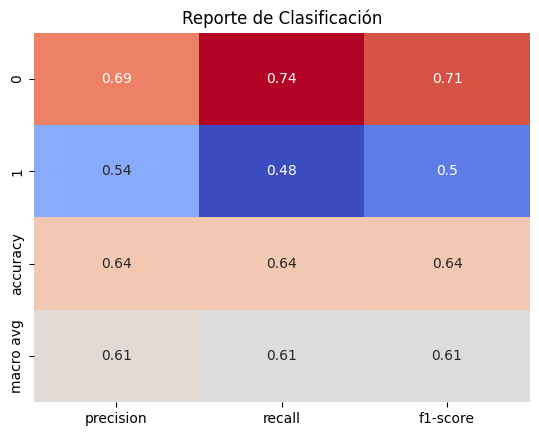

In [56]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Visualizamos el reporte de clasificación con colores usando seaborn
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap=cmap, cbar=False)
plt.title('Reporte de Clasificación')
plt.show()

- `Precision`: La `precisión` es la proporción de ejemplos clasificados como positivos por el modelo que realmente son positivos. En este caso, la `precisión` para la `clase 0` es del 69% y para la `clase 1` es del 54%. Esto significa que el 69% de los ejemplos clasificados como clase 0 son verdaderamente `clase 0`, y el 54% de los ejemplos clasificados como `clase 1` son verdaderamente clase 1.

- `Recall`: El `recall`, también conocido como sensibilidad, es la proporción de ejemplos positivos que fueron correctamente identificados por el modelo. En este caso, el `recall` para la `clase 0` es del 74% y para la `clase 1` es del 48%. Esto significa que el 74% de los ejemplos de la `clase 0` fueron correctamente identificados por el modelo, y solo el 48% de los ejemplos de la `clase 1` fueron correctamente identificados.

- `F1-score`: La puntuación `F1` es la media armónica de la precisión y el `recall`, y es una medida que tiene en cuenta tanto los falsos positivos como los falsos negativos. En este caso, la puntuación `F1` para la `clase 0` es del 71% y para la `clase 1` es del 50%.

- `Support`: El soporte es el número de ocurrencias reales de cada clase en el conjunto de datos.

En general, estos resultados indican que el modelo tiene un rendimiento decente para la `clase 0` (precisión del 69%, `recall` del 74% y F1-score del 71%), pero un rendimiento menos satisfactorio para la `clase 1` (`precisión` del 54%, `recall` del 48% y `F1-score` del 50%). Aunque si bien mejora un poco respecto al experimento con el mismo input pero sin aplicar el analisis principal de componentes `PCA`, sigue siendo un poco bajo para identificar apropiadamente la clase minoritaria

## Curva de aprendizaje

In [ ]:
# Llamar a la función para graficar la curva de aprendizaje
plot_learning_curve(random_forest, X_train, y_train, title='Curva de aprendizaje')
plt.show()

la puntuación de entrenamiento se mantiene constante en 1, lo cual indica que el modelo está memorizando los datos de entrenamiento perfectamente, pero la puntuación de validación cruzada (cross-validation score) está cambiando a medida que aumenta el tamaño del conjunto de entrenamiento.

**Puntuación de entrenamiento constante en 1:**

 Esto sugiere que el modelo está ajustando perfectamente los datos de entrenamiento, lo que puede ser una señal de sobreajuste (overfitting). El modelo puede estar memorizando los datos en lugar de aprender patrones generales que se pueden aplicar a datos nuevos.

**Curva de validación cruzada cambiante:**

 - Inicialmente, la puntuación de validación cruzada es más baja, pero a medida que aumenta el tamaño del conjunto de entrenamiento, la puntuación de validación cruzada mejora. Esto indica que agregar más datos de entrenamiento está ayudando al modelo a generalizar mejor.
 - Sin embargo, es importante observar si hay una tendencia constante de mejora o si la puntuación de validación cruzada se estabiliza en un cierto punto. Y en este caso el modelo ha alcanzado su límite de capacidad de aprendizaje y agregar más datos no mejorará significativamente el rendimiento.

## Curva de calibración

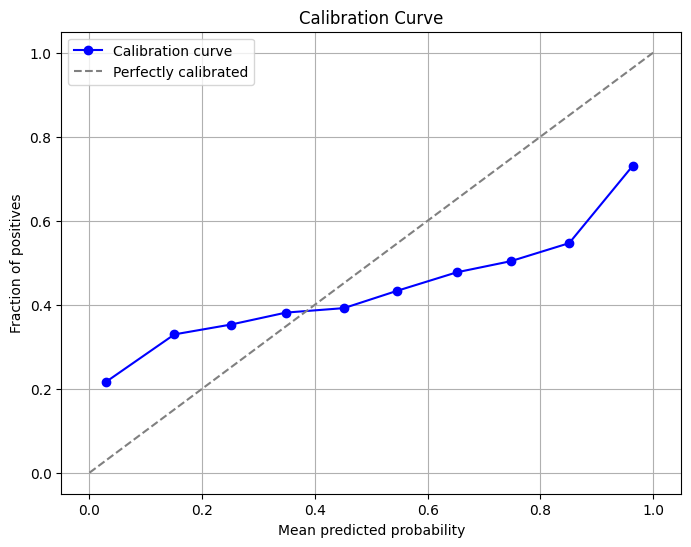

In [ ]:
plot_calibration_curve(y_test, y_prob)

**Fracción de Positivos**: Esta columna indica la proporción de ejemplos positivos observados en cada grupo de predicciones. Por ejemplo, en el primer bin, la fracción de positivos es aproximadamente 0.217, lo que significa que alrededor del 21.7% de los ejemplos en este rango tienen una etiqueta positiva.

**Media de la Probabilidad Predicha**: Esta columna representa la probabilidad promedio predicha para los ejemplos en cada bin. Por ejemplo, en el primer bin, la media de la probabilidad predicha es aproximadamente 0.030, lo que sugiere que, en promedio, los ejemplos en este rango tienen una probabilidad predicha baja de ser positivos.

Al observar estos valores, podemos notar cómo cambia la relación entre la fracción de positivos y la media de la probabilidad predicha a medida que nos movemos a través de los diferentes bins. Idealmente, queremos que la curva de calibración esté lo más cerca posible de la línea punteada "Perfectamente calibrada", donde la fracción de positivos coincide con la media de la probabilidad predicha.

En este caso, podemos ver que la fracción de positivos y la media de la probabilidad predicha aumentan de manera bastante uniforme a medida que nos movemos a través de los bins, lo que indica que el modelo está calibrando razonablemente bien las probabilidades predichas. Esto sugiere que el modelo está siendo consistente en su estimación de las probabilidades, lo que es una buena señal en términos de calibración.

## Curva ROC

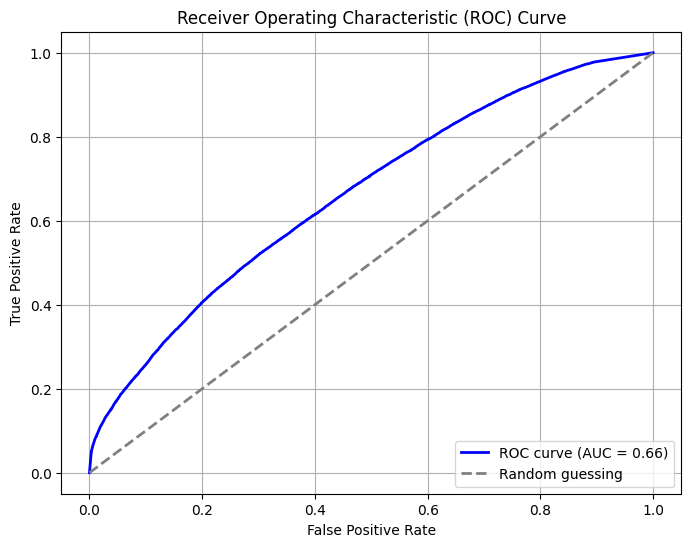

In [ ]:
plot_roc_curve(y_test, y_prob)

Un `AUC` de 0.66 sugiere que el clasificador tiene cierta capacidad para distinguir entre las clases positivas y negativas, pero aún hay margen de mejora. Un `AUC` entre 0.5 y 0.7 generalmente se considera aceptable.

## Feature importance

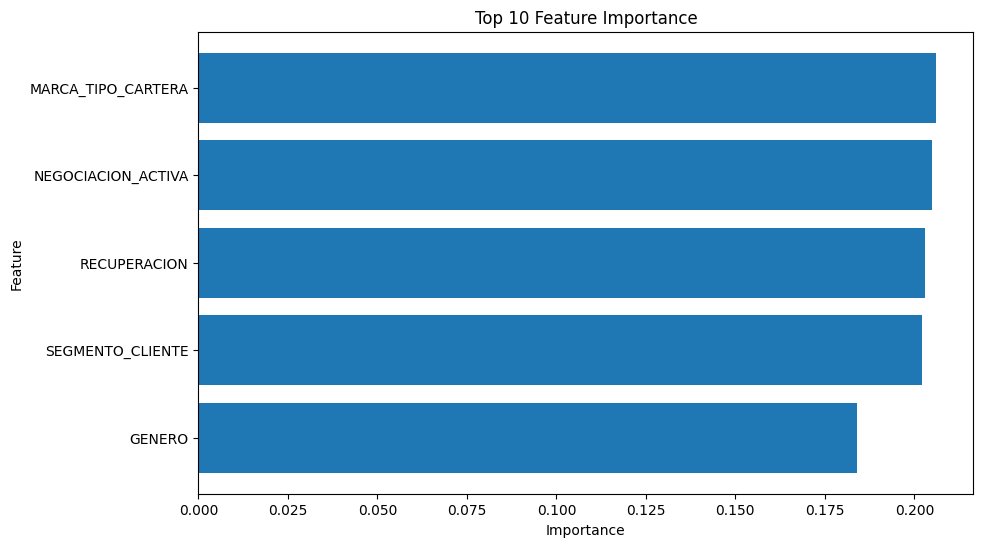

In [ ]:
# Obtener los nombres de las características del DataFrame
feature_names = df.columns.tolist()

# Llamando a la función plot_feature_importance con tu modelo y nombres de características
plot_feature_importance(random_forest, feature_names=feature_names)

Explicar.....

## Analisis de resultados del experimento

# ➡️ **Experimento 3 - Input Original con balanceo de clases**

---


## Importamos datos

In [ ]:
df = pd.read_csv("input_transformada.csv", sep=';', encoding ="latin-1")
df.head(5)

,GENERO,SEGMENTO_CLIENTE,RECUPERACION,NEGOCIACION_ACTIVA,MARCA_TIPO_CARTERA,PRIORIDAD,EDAD,RIESGO_ACTUAL,MORA_INICIAL,MORA_ACTUAL,...,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,DESC_ACTIVIDAD_codificado,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,ESTADO_ICS_ACTUAL,MOTIVO_NO_PAGO_codificado,SUB_PRODUCTO_codificado,RANGO_HORA
0,1,0,2,0,1,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,1
1,1,0,2,0,1,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,0
2,1,0,2,0,1,21,23,0,30,0,...,9,1,1,3,3,26,6,6,3,0
3,1,0,2,0,1,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,0
4,1,0,2,0,1,5,23,0,30,0,...,9,1,1,3,3,26,6,6,3,1


## Aplicamos sampling

In [ ]:
# Crear un nuevo dataframe para cada clase
df_morning = df[df['RANGO_HORA'] == 0]
df_tarde = df[df['RANGO_HORA'] == 1]

min_samples = min(len(df_morning), len(df_tarde))

# Aplicar el subsampling a cada clase
df_morning_subsampled = df_morning.sample(n=min_samples, random_state=42)
df_tarde_subsampled = df_tarde.sample(n=min_samples, random_state=42)

# Concatenar los dataframes de las clases subsampleadas
df_subsampled = pd.concat([df_morning_subsampled, df_tarde_subsampled])
df_subsampled['RANGO_HORA'].value_counts()

RANGO_HORA
0    216920
1    216920
Name: count, dtype: int64

## Dividimos para nuestro conjunto de entrenamiento y pruebas

In [ ]:
X = df_subsampled.drop(columns=['RANGO_HORA'])
y = df_subsampled['RANGO_HORA']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenamiento del modelo

In [ ]:
random_forest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                       criterion='gini', max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0, min_samples_leaf=1,
                                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=365, verbose=0,
                                       warm_start=False)

# Entrenar el modelo con tus datos de entrenamiento
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=365)

## Generamos predicciones

In [ ]:
y_pred = random_forest.predict(X_test)

## Matriz de confusión

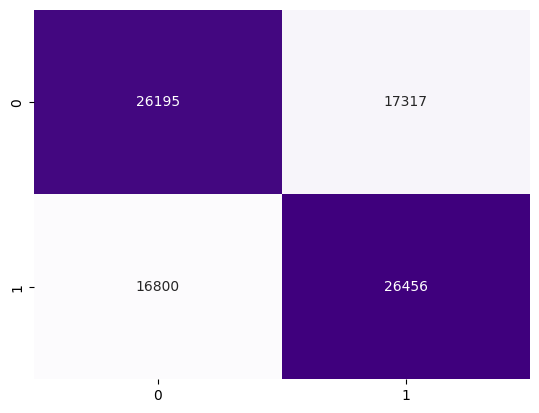

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
sns.heatmap(cm,  annot=True, fmt='g', cmap='Purples', cbar=False)
plt.show()

valores obtenidos en la matriz de confusión:

True Negatives (TN): 26195
False Positives (FP): 17317
False Negatives (FN): 16800
True Positives (TP): 26456

Interpretacion:

True Negatives (TN): Esto indica que 26,195 ejemplos fueron correctamente clasificados como negativos por el modelo.

False Positives (FP): Esto indica que 17,317 ejemplos fueron incorrectamente clasificados como positivos por el modelo. En otras palabras, el modelo predijo que estos ejemplos pertenecían a la clase positiva cuando en realidad eran negativos.

False Negatives (FN): Esto indica que 16,800 ejemplos fueron incorrectamente clasificados como negativos por el modelo. El modelo predijo que estos ejemplos pertenecían a la clase negativa cuando en realidad eran positivos.

True Positives (TP): Esto indica que 26,456 ejemplos fueron correctamente clasificados como positivos por el modelo.

## Reporte de clasificación

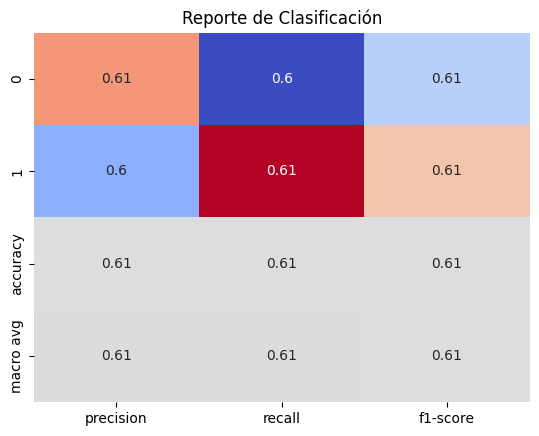

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Visualizamos el reporte de clasificación con colores usando seaborn
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap=cmap, cbar=False)
plt.title('Reporte de Clasificación')
plt.show()

Precision: La precisión es la proporción de ejemplos clasificados como positivos por el modelo que realmente son positivos. En este caso, la precisión para la clase 0 es del 61% y para la clase 1 es del 60%. Esto significa que el 61% de los ejemplos clasificados como clase 0 son verdaderamente clase 0, y el 60% de los ejemplos clasificados como clase 1 son verdaderamente clase 1.

Recall: El recall, también conocido como sensibilidad, es la proporción de ejemplos positivos que fueron correctamente identificados por el modelo. En este caso, el recall para la clase 0 es del 60% y para la clase 1 es del 61%. Esto significa que el 60% de los ejemplos de la clase 0 fueron correctamente identificados por el modelo, y el 61% de los ejemplos de la clase 1 fueron correctamente identificados.

F1-score: La puntuación F1 es la media armónica de la precisión y el recall, y es una medida que tiene en cuenta tanto los falsos positivos como los falsos negativos. En este caso, la puntuación F1 para ambas clases es del 61%

Support: El soporte es el número de ocurrencias reales de cada clase en el conjunto de datos.


En general, estos resultados indican que al aplicar una técnica de muestreo, si bien sacrificamos rendimiento para la clase 0, garantizamos que la clase 1 que estaba teniendo un rendimiento muy bajo casi similar al azar, lograra ser equilibrado, que a la larga resulta ser mucho mas beneficioso para nuestro proposito.

## Curva de aprendizaje

In [ ]:
# Llamar a la función para graficar la curva de aprendizaje
plot_learning_curve(random_forest, X_train, y_train, title='Curva de aprendizaje')
plt.show()

la puntuación de entrenamiento se mantiene constante en 1, lo cual indica que el modelo está memorizando los datos de entrenamiento perfectamente, pero la puntuación de validación cruzada (cross-validation score) está cambiando a medida que aumenta el tamaño del conjunto de entrenamiento.

**Puntuación de entrenamiento constante en 1:**

 Esto sugiere que el modelo está ajustando perfectamente los datos de entrenamiento, lo que puede ser una señal de sobreajuste (overfitting). El modelo puede estar memorizando los datos en lugar de aprender patrones generales que se pueden aplicar a datos nuevos.

**Curva de validación cruzada cambiante:**

 - Inicialmente, la puntuación de validación cruzada es más baja, pero a medida que aumenta el tamaño del conjunto de entrenamiento, la puntuación de validación cruzada mejora. Esto indica que agregar más datos de entrenamiento está ayudando al modelo a generalizar mejor.
 - Sin embargo, es importante observar si hay una tendencia constante de mejora o si la puntuación de validación cruzada se estabiliza en un cierto punto. Y en este caso el modelo ha alcanzado su límite de capacidad de aprendizaje y agregar más datos no mejorará significativamente el rendimiento.

## Curva de calibración

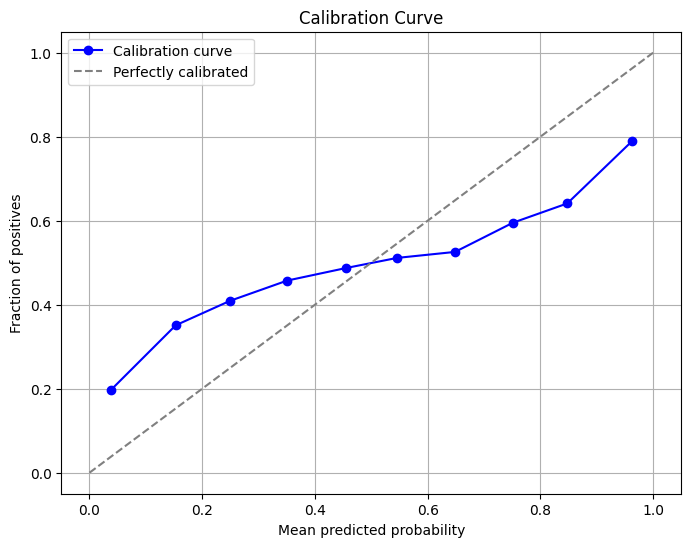

In [ ]:
plot_calibration_curve(y_test, y_prob)

Fracción de Positivos: Esta columna indica la proporción de ejemplos positivos observados en cada grupo de predicciones. Por ejemplo, en el primer bin, la fracción de positivos es aproximadamente 0.197, lo que significa que alrededor del 19.7% de los ejemplos en este rango tienen una etiqueta positiva.

Media de la Probabilidad Predicha: Esta columna representa la probabilidad promedio predicha para los ejemplos en cada bin. Por ejemplo, en el primer bin, la media de la probabilidad predicha es aproximadamente 0.038, lo que sugiere que, en promedio, los ejemplos en este rango tienen una probabilidad predicha baja de ser positivos.

Al observar estos valores, podemos notar cómo cambia la relación entre la fracción de positivos y la media de la probabilidad predicha a medida que nos movemos a través de los diferentes bins. Idealmente, queremos que la curva de calibración esté lo más cerca posible de la línea punteada "Perfectamente calibrada", donde la fracción de positivos coincide con la media de la probabilidad predicha.

En este caso, al igual que en los resultados anteriores, podemos ver que la fracción de positivos y la media de la probabilidad predicha aumentan de manera bastante uniforme a medida que nos movemos a través de los bins, lo que indica que el modelo está calibrando razonablemente bien las probabilidades predichas. Esto sugiere que el modelo está siendo consistente en su estimación de las probabilidades, lo que es una buena señal en términos de calibración.

## Curva ROC

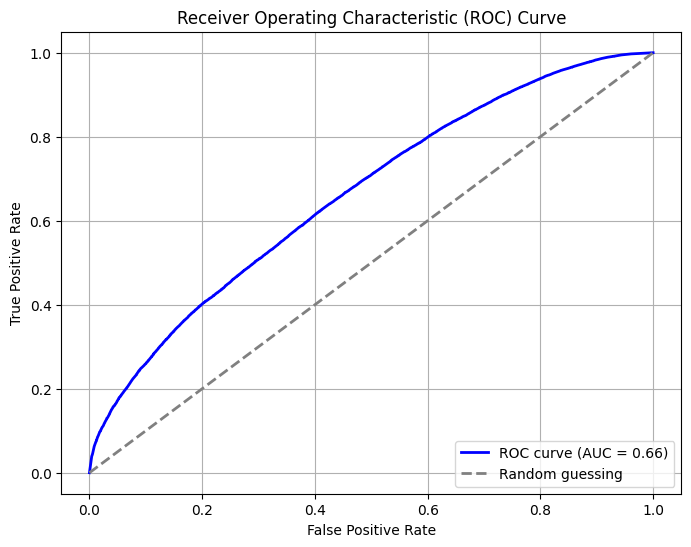

In [ ]:
plot_roc_curve(y_test, y_prob)

Un AUC de 0.66 sugiere que el clasificador tiene cierta capacidad para distinguir entre las clases positivas y negativas, pero aún hay margen de mejora. Un AUC entre 0.5 y 0.7 generalmente se considera aceptable.

## Feature importance

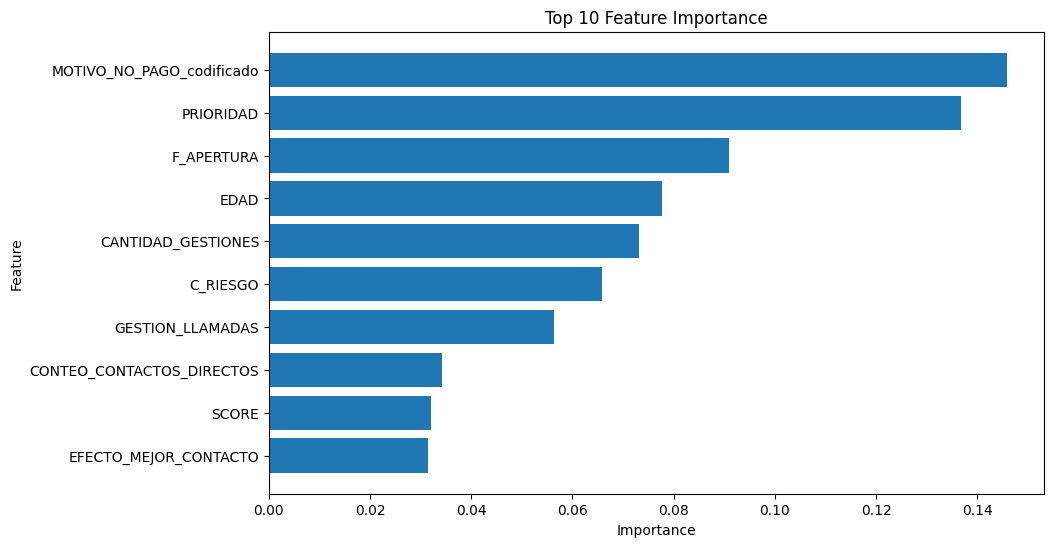

In [ ]:
# Obtener los nombres de las características del DataFrame
feature_names = df.columns.tolist()

# Llamando a la función plot_feature_importance con tu modelo y nombres de características
plot_feature_importance(random_forest, feature_names=feature_names)

Explicar....

## Analisis de resultados del experimento

....

# ➡️ **Experimento 4 - Input Original con balanceo de clases + PCA**

---

## Importamos nuestro input

In [ ]:
df = pd.read_csv("input_transformada.csv", sep=';', encoding ="latin-1")
df.head(5)

,GENERO,SEGMENTO_CLIENTE,RECUPERACION,NEGOCIACION_ACTIVA,MARCA_TIPO_CARTERA,PRIORIDAD,EDAD,RIESGO_ACTUAL,MORA_INICIAL,MORA_ACTUAL,...,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,DESC_ACTIVIDAD_codificado,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,ESTADO_ICS_ACTUAL,MOTIVO_NO_PAGO_codificado,SUB_PRODUCTO_codificado,RANGO_HORA
0,1,0,2,0,1,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,1
1,1,0,2,0,1,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,0
2,1,0,2,0,1,21,23,0,30,0,...,9,1,1,3,3,26,6,6,3,0
3,1,0,2,0,1,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,0
4,1,0,2,0,1,5,23,0,30,0,...,9,1,1,3,3,26,6,6,3,1


## Aplicamos PCA

In [ ]:
df_predictors = df.drop(columns=['RANGO_HORA'])
num_components = 5

# Aplica PCA con el número deseado de componentes principales
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(df_predictors)  # 'df_predictors' son las variables predictoras sin la variable objetivo

# Creamos un nuevo DataFrame con las componentes principales como características
df_pca = pd.DataFrame(data=X_pca, columns=[f'Componente_{i+1}' for i in range(num_components)])

# Concatena la variable objetivo ('RANGO_HORA') al DataFrame de las componentes principales
df_pca['RANGO_HORA'] = df['RANGO_HORA']

## Aplicamos sampling

In [ ]:
# Crear un nuevo dataframe para cada clase
df_morning = df_pca[df_pca['RANGO_HORA'] == 0]
df_tarde = df_pca[df_pca['RANGO_HORA'] == 1]

min_samples = min(len(df_morning), len(df_tarde))

# Aplicar el subsampling a cada clase
df_morning_subsampled = df_morning.sample(n=min_samples, random_state=42)
df_tarde_subsampled = df_tarde.sample(n=min_samples, random_state=42)

# Concatenar los dataframes de las clases subsampleadas
df_subsampled = pd.concat([df_morning_subsampled, df_tarde_subsampled])
df_subsampled['RANGO_HORA'].value_counts()

RANGO_HORA
0    216920
1    216920
Name: count, dtype: int64

## Dividimos para nuestro conjunto de entrenamiento y pruebas

In [ ]:
X = df_subsampled.drop(columns=['RANGO_HORA'])
y = df_subsampled['RANGO_HORA']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenamiento del modelo

In [ ]:
random_forest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                       criterion='gini', max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0, min_samples_leaf=1,
                                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=365, verbose=0,
                                       warm_start=False)

# Entrenar el modelo con tus datos de entrenamiento
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=365)

## Generamos predicciones

In [ ]:
y_pred = random_forest.predict(X_test)

## Matriz de confusión

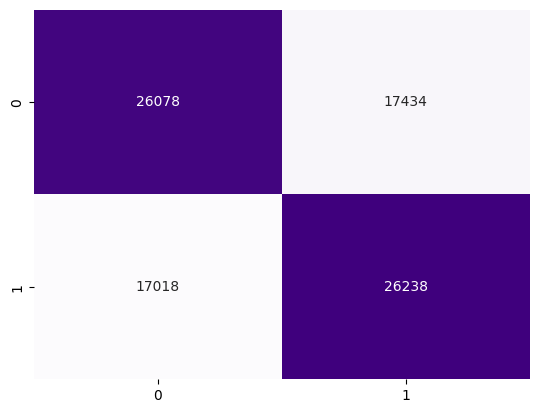

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
sns.heatmap(cm,  annot=True, fmt='g', cmap='Purples', cbar=False)
plt.show()

valores obtenidos en la matriz de confusión:

True Negatives (TN): 26078
False Positives (FP): 17434
False Negatives (FN): 17018
True Positives (TP): 26238

Interpretacion:

True Negatives (TN): Esto indica que 26,078 ejemplos fueron correctamente clasificados como negativos por el modelo.

False Positives (FP): Esto indica que 17,434 ejemplos fueron incorrectamente clasificados como positivos por el modelo. En otras palabras, el modelo predijo que estos ejemplos pertenecían a la clase positiva cuando en realidad eran negativos.

False Negatives (FN): Esto indica que 17,018 ejemplos fueron incorrectamente clasificados como negativos por el modelo. El modelo predijo que estos ejemplos pertenecían a la clase negativa cuando en realidad eran positivos.

True Positives (TP): Esto indica que 26,238 ejemplos fueron correctamente clasificados como positivos por el modelo.

## Reporte de clasificación

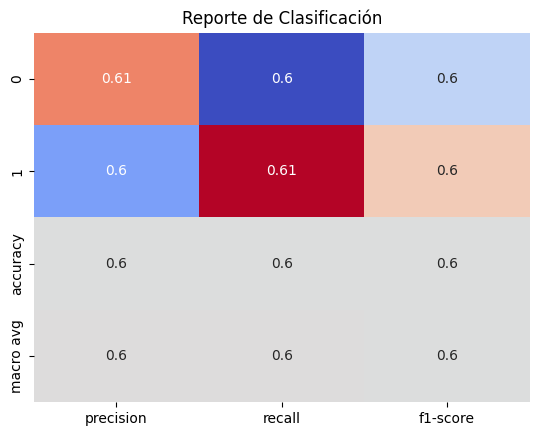

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Visualizamos el reporte de clasificación con colores usando seaborn
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap=cmap, cbar=False)
plt.title('Reporte de Clasificación')
plt.show()

Precision: La precisión es la proporción de ejemplos clasificados como positivos por el modelo que realmente son positivos. En este caso, la precisión para la clase 0 es del 61% y para la clase 1 es del 60%. Esto significa que el 61% de los ejemplos clasificados como clase 0 son verdaderamente clase 0, y el 60% de los ejemplos clasificados como clase 1 son verdaderamente clase 1.

Recall: El recall, también conocido como sensibilidad, es la proporción de ejemplos positivos que fueron correctamente identificados por el modelo. En este caso, el recall para la clase 0 es del 60% y para la clase 1 es del 61%. Esto significa que el 60% de los ejemplos de la clase 0 fueron correctamente identificados por el modelo, y el 61% de los ejemplos de la clase 1 fueron correctamente identificados.

F1-score: La puntuación F1 es la media armónica de la precisión y el recall, y es una medida que tiene en cuenta tanto los falsos positivos como los falsos negativos. En este caso, la puntuación F1 para ambas clases es del 60%

Support: El soporte es el número de ocurrencias reales de cada clase en el conjunto de datos.


En general, estos resultados indican que al aplicar una técnica de muestreo, si bien sacrificamos rendimiento para la clase 0, garantizamos que la clase 1 que estaba teniendo un rendimiento muy bajo casi similar al azar, lograra ser equilibrado, que a la larga resulta ser mucho mas beneficioso para nuestro proposito. Aunque al aplicar PCA disminuimos en un 1% el F1 Score y si contrastamos con el experimento 3, si puede afectar a la larga el rendimiento al generar nuevas predicciones.

## Curva de aprendizaje

In [ ]:
# Llamar a la función para graficar la curva de aprendizaje
plot_learning_curve(random_forest, X_train, y_train, title='Curva de aprendizaje')
plt.show()

la puntuación de entrenamiento se mantiene constante en 1, lo cual indica que el modelo está memorizando los datos de entrenamiento perfectamente, pero la puntuación de validación cruzada (cross-validation score) está cambiando a medida que aumenta el tamaño del conjunto de entrenamiento.

**Puntuación de entrenamiento constante en 1:**

 Esto sugiere que el modelo está ajustando perfectamente los datos de entrenamiento, lo que puede ser una señal de sobreajuste (overfitting). El modelo puede estar memorizando los datos en lugar de aprender patrones generales que se pueden aplicar a datos nuevos.

**Curva de validación cruzada cambiante:**

 - Inicialmente, la puntuación de validación cruzada es más baja, pero a medida que aumenta el tamaño del conjunto de entrenamiento, la puntuación de validación cruzada mejora. Esto indica que agregar más datos de entrenamiento está ayudando al modelo a generalizar mejor.
 - Sin embargo, es importante observar si hay una tendencia constante de mejora o si la puntuación de validación cruzada se estabiliza en un cierto punto. Y en este caso el modelo ha alcanzado su límite de capacidad de aprendizaje y agregar más datos no mejorará significativamente el rendimiento.

## Curva de calibración

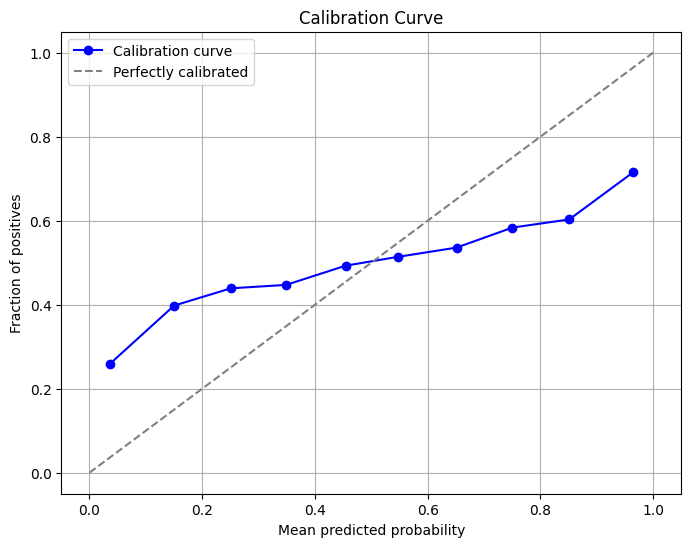

In [ ]:
plot_calibration_curve(y_test, y_prob)

Fracción de Positivos: Esta columna indica la proporción de ejemplos positivos observados en cada grupo de predicciones. Por ejemplo, en el primer bin, la fracción de positivos es aproximadamente 0.259, lo que significa que alrededor del 25.9% de los ejemplos en este rango tienen una etiqueta positiva.

Media de la Probabilidad Predicha: Esta columna representa la probabilidad promedio predicha para los ejemplos en cada bin. Por ejemplo, en el primer bin, la media de la probabilidad predicha es aproximadamente 0.036, lo que sugiere que, en promedio, los ejemplos en este rango tienen una probabilidad predicha baja de ser positivos.

Al observar estos valores, podemos notar cómo cambia la relación entre la fracción de positivos y la media de la probabilidad predicha a medida que nos movemos a través de los diferentes bins. Idealmente, queremos que la curva de calibración esté lo más cerca posible de la línea punteada "Perfectamente calibrada", donde la fracción de positivos coincide con la media de la probabilidad predicha.

En este caso específico, podemos ver que la fracción de positivos y la media de la probabilidad predicha aumentan de manera relativamente uniforme a medida que nos movemos a través de los bins. Esto sugiere que el modelo está calibrando razonablemente bien las probabilidades predichas, lo que es una buena señal en términos de calibración.

## Curva ROC

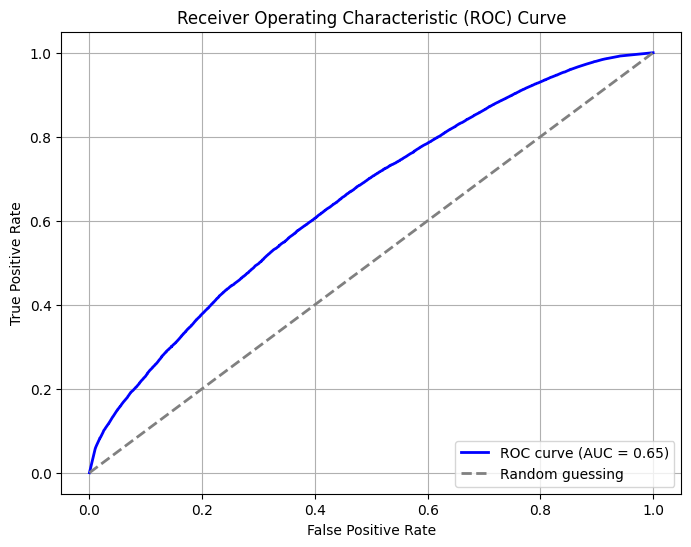

In [ ]:
plot_roc_curve(y_test, y_prob)

Un AUC de 0.65 sugiere que el clasificador tiene cierta capacidad para distinguir entre las clases positivas y negativas, pero aún hay margen de mejora. Un AUC entre 0.5 y 0.7 generalmente se considera aceptable.

## Feature importance

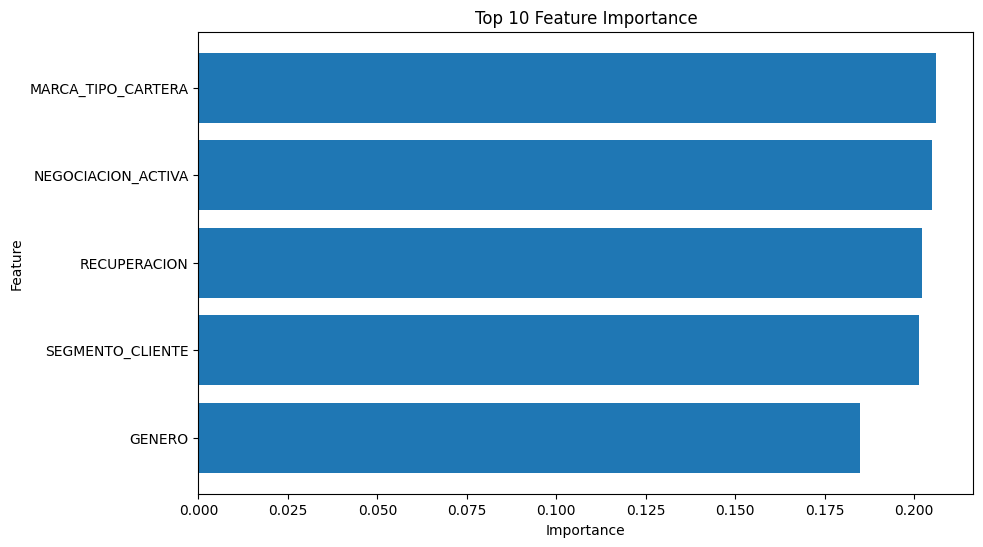

In [ ]:
# Obtener los nombres de las características del DataFrame
feature_names = df.columns.tolist()

# Llamando a la función plot_feature_importance con tu modelo y nombres de características
plot_feature_importance(random_forest, feature_names=feature_names)

## Analisis de resultados del experimento

....

# 🚀 **Conclusiones generales**


VAOS A USAR LA METRICA DE PRECISIÓN PARA ESTE MODELO Y UN COMPONENTE Y CURVA ROC

Tener en cuenta esto

Es normal observar variaciones en la importancia de las características (feature importance) entre diferentes ejecuciones o experimentos, especialmente cuando se utilizan algoritmos como Random Forest, que pueden tener una alta sensibilidad a la variación en los datos de entrada. Aquí hay algunas razones por las cuales podrías observar diferencias en la importancia de las características entre experimentos:

Aleatoriedad en el entrenamiento del modelo: Al entrenar un modelo de Random Forest, se utilizan árboles de decisión individuales que se construyen de forma aleatoria utilizando subconjuntos aleatorios de características y muestras. Como resultado, cada vez que se entrena el modelo, la composición y estructura de los árboles individuales puede variar, lo que conduce a diferencias en la importancia de las características.

Sensibilidad a la variación de los datos: Pequeñas variaciones en los datos de entrada, como cambios en la distribución de las muestras o la presencia de valores atípicos, pueden influir en la importancia de las características. Esto es especialmente cierto si el conjunto de datos es relativamente pequeño o si las características son altamente correlacionadas entre sí.

Parámetros del modelo: Los parámetros del modelo, como el número de árboles en el bosque (n_estimators) o la profundidad máxima de los árboles (max_depth), pueden afectar la importancia relativa de las características. Ajustar estos parámetros puede cambiar la forma en que se construyen los árboles y, por lo tanto, influir en la importancia de las características.

Interacción entre características: La importancia de una característica puede cambiar dependiendo de las características con las que interactúa en el modelo. Esto puede conducir a diferencias en la importancia de las características entre diferentes ejecuciones del modelo.

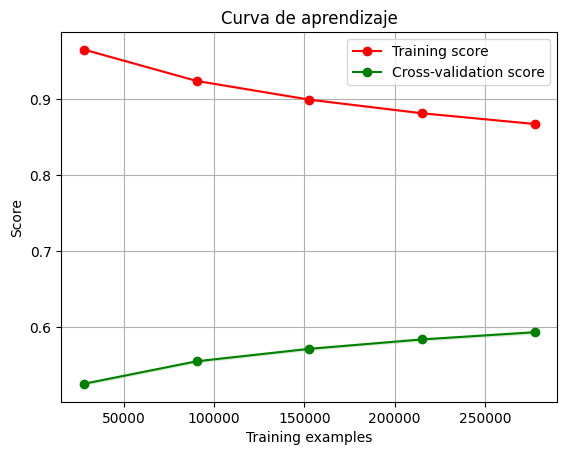

In [ ]:
def plot_learning_curve(estimator, X, y, title=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Supongamos que ya tienes tus datos de entrenamiento X_train, y_train

# Crear un RandomForestClassifier con los mismos parámetros que el modelo entrenado
random_forest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                       criterion='gini', max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0, min_samples_leaf=1,
                                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=365, verbose=0,
                                       warm_start=False)

# Llamar a la función para graficar la curva de aprendizaje
plot_learning_curve(random_forest, X_train, y_train, title='Curva de aprendizaje')
plt.show()

# IMPORTANTEEEEEEEEEEEEEEEE PARA EXPLICAR CURVAS DE APRENDIZAJE

Aquí hay algunas consideraciones adicionales para explorar mientras investigas el sobreajuste:

Complejidad del modelo RandomForest: Dado que estás utilizando RandomForestClassifier, un modelo que puede ser propenso al sobreajuste, sería útil explorar la complejidad del modelo. Puedes ajustar los hiperparámetros del RandomForestClassifier, como la profundidad máxima de los árboles (max_depth) o el número de árboles en el bosque (n_estimators), para controlar la complejidad del modelo y mitigar el sobreajuste.

Exploración de otros hiperparámetros: Además de la complejidad del modelo, hay otros hiperparámetros que podrían influir en el rendimiento del RandomForestClassifier, como la cantidad mínima de muestras requeridas para dividir un nodo (min_samples_split) o la cantidad mínima de muestras requeridas en cada hoja (min_samples_leaf). Experimentar con diferentes valores de estos hiperparámetros podría ayudar a mejorar el rendimiento del modelo.

Otras técnicas de regularización: Además de ajustar los hiperparámetros del modelo, puedes explorar otras técnicas de regularización para mitigar el sobreajuste, como la validación cruzada para la selección de hiperparámetros o la aplicación de técnicas de ensamblaje como bagging o boosting.

Evaluación detallada del conjunto de datos: También es importante realizar una evaluación detallada del conjunto de datos, incluyendo la distribución de las clases, la presencia de características redundantes o irrelevantes, y la calidad de los datos en general. Identificar posibles problemas en el conjunto de datos puede ayudar a abordar el sobreajuste de manera más efectiva.